In [88]:
from google.colab import drive                     # to connect the drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### House grade prediction
#### Problem statement:
property buyers has different requirements so we need to determine the garde of the house cosidering different parameters.

Application of predicting the garde of house:
It helps the agent in identifying the type of the house customer looking for.

While selecting the house price is the main factor,Grading differentiate the price of the house based upon grades.

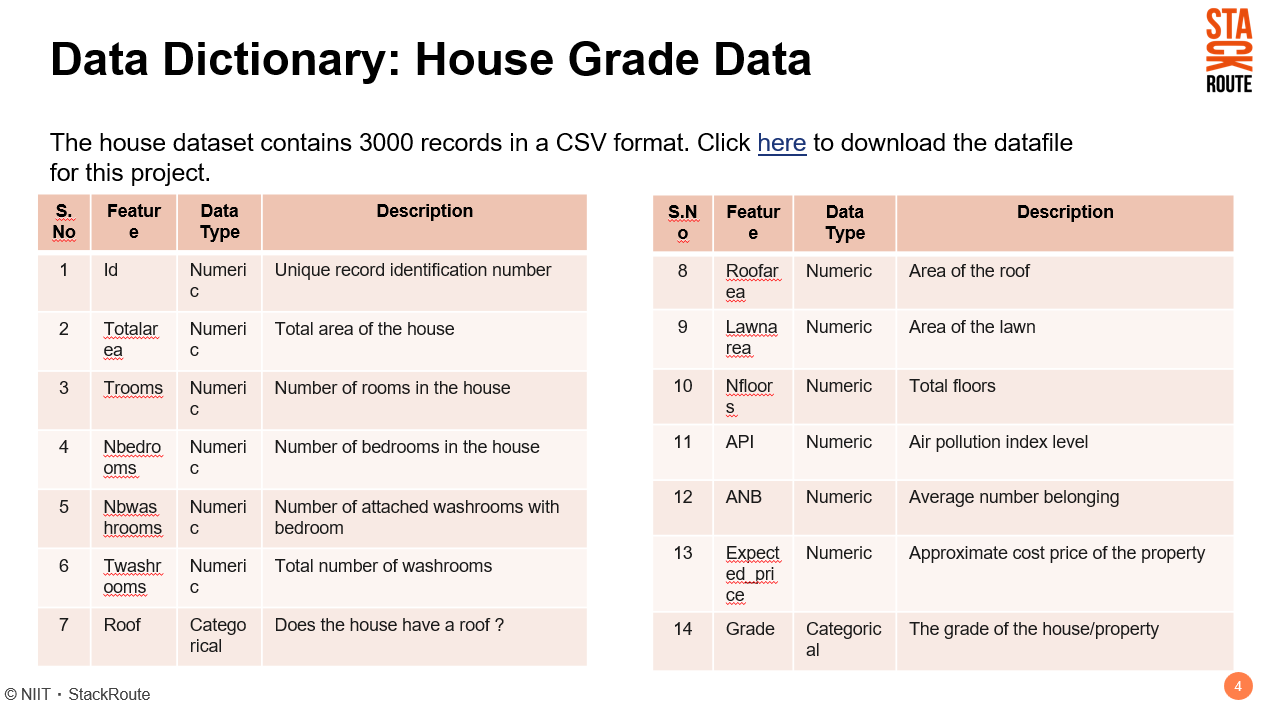

In [89]:
import numpy as np 
import pandas as pd 
from numpy import mean
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt 
from matplotlib import pyplot
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
import seaborn as sb

from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.simplefilter(action='ignore')

In [90]:
#READING THE CSV FILE
house_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/DATA/DS3_C6_S2_Classification_HouseGrade_Data_Project.csv')
house_data

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,341,9,6,5,7,YES,95,115,5,90,2,4246,B
2996,2997,292,9,8,7,8,YES,116,87,7,97,4,3753,A
2997,2998,328,7,4,3,5,NO,0,78,5,95,6,3607,D
2998,2999,293,9,7,7,8,NO,0,78,7,51,3,4198,B


In [91]:
#SUMMARY OF THE DATASET
house_data.describe()       

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,1500.500000,325.117000,7.021667,5.023000,4.513667,6.010667,48.980667,95.609333,4.013333,70.190667,3.47900,3782.938333
std,866.169729,20.507742,1.421221,1.634838,1.715263,1.786136,48.746641,14.837388,1.621532,17.563460,1.69426,567.189995
min,1.000000,290.000000,5.000000,2.000000,1.000000,2.000000,0.000000,70.000000,1.000000,40.000000,1.00000,2504.000000
25%,750.750000,308.000000,6.000000,4.000000,3.000000,5.000000,0.000000,83.000000,3.000000,55.000000,2.00000,3354.000000
50%,1500.500000,325.000000,7.000000,5.000000,4.000000,6.000000,71.000000,96.000000,4.000000,70.000000,4.00000,3771.000000
75%,2250.250000,343.000000,8.000000,6.000000,6.000000,7.000000,96.000000,109.000000,5.000000,85.000000,5.00000,4208.000000
max,3000.000000,360.000000,9.000000,8.000000,8.000000,10.000000,120.000000,120.000000,7.000000,100.000000,6.00000,5216.000000


In [92]:
print(house_data.isnull().sum())# Checking for null value in each column

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64


In [93]:
house_data = house_data.replace(to_replace = "@_!#$%^&*()<>?/\|}{~:?", value = np.nan)        ## check special character in dataset 

In [94]:
print(house_data.isnull().sum())        # Checking for null value in each column

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64


THERE ARE NO SPECIAL CHARACTERS IN THE DATASET.

In [95]:
house_data.dtypes

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

In [96]:
import plotly.express as px
df = px.data.tips()
# Here we use a column with categorical data
fig = px.histogram(house_data, x="Grade")
fig.show()

VISUALY CHECKING THE SPREAD OF THE DATA, BY BO PLOT AND HISTOGRAM.

In [97]:
fig = px.histogram(house_data, x="Expected price", marginal = 'box')
fig.show()


In [98]:
fig = px.histogram(house_data, x="Nbedrooms", marginal = 'box')
fig.show()

In [99]:
fig = px.histogram(house_data, x="Area(total)", marginal = 'box')
fig.show()

In [100]:
fig = px.histogram(house_data, x="Trooms", marginal = 'box')
fig.show()

In [101]:
house_data2 = house_data.copy()

In [102]:
#Converting categorical data into numerical type

category=[]                                                 #creating list of all categorical/object columns 
for i in house_data2.select_dtypes('object').columns:
  category.append(i)
label_encoder = preprocessing.LabelEncoder()
for i in category:
  house_data2[i] = label_encoder.fit_transform(house_data2[i])
house_data2.dtypes

Id                int64
Area(total)       int64
Trooms            int64
Nbedrooms         int64
Nbwashrooms       int64
Twashrooms        int64
roof              int64
Roof(Area)        int64
Lawn(Area)        int64
Nfloors           int64
API               int64
ANB               int64
Expected price    int64
Grade             int64
dtype: object

In [103]:
house_data2

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,0,0,76,2,79,6,3481,3
1,2,358,5,4,3,4,1,71,96,3,72,4,3510,3
2,3,324,7,5,4,5,1,101,117,5,64,3,3748,2
3,4,330,6,4,3,5,1,101,82,2,59,2,3134,3
4,5,320,7,4,4,5,0,0,75,3,40,1,3843,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,341,9,6,5,7,1,95,115,5,90,2,4246,1
2996,2997,292,9,8,7,8,1,116,87,7,97,4,3753,0
2997,2998,328,7,4,3,5,0,0,78,5,95,6,3607,3
2998,2999,293,9,7,7,8,0,0,78,7,51,3,4198,1


In [104]:
house_data3=house_data2.copy()

SCALLING THE DATA


In [105]:

# Defining method to perform data scaling operation based on the type of scaling
def feature_scale(scale):
  if scale == 'minmax':
    scaler = MinMaxScaler()
  else:
    scaler = StandardScaler()
  house_data_scaled = pd.DataFrame(scaler.fit_transform(house_data3.to_numpy()),columns=house_data3.columns)
  return house_data_scaled

In [106]:
scale = 'minmax' # scaling the data using minmax Scaling process
house_data_scaled=feature_scale(scale)
house_data_scaled

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,0.000000,0.700000,0.25,0.500000,0.428571,0.500,0.0,0.000000,0.12,0.166667,0.650000,1.0,0.360251,0.75
1,0.000333,0.971429,0.00,0.333333,0.285714,0.250,1.0,0.591667,0.52,0.333333,0.533333,0.6,0.370944,0.75
2,0.000667,0.485714,0.50,0.500000,0.428571,0.375,1.0,0.841667,0.94,0.666667,0.400000,0.4,0.458702,0.50
3,0.001000,0.571429,0.25,0.333333,0.285714,0.375,1.0,0.841667,0.24,0.166667,0.316667,0.2,0.232301,0.75
4,0.001334,0.428571,0.50,0.333333,0.428571,0.375,0.0,0.000000,0.10,0.333333,0.000000,0.0,0.493732,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.998666,0.728571,1.00,0.666667,0.571429,0.625,1.0,0.791667,0.90,0.666667,0.833333,0.2,0.642330,0.25
2996,0.999000,0.028571,1.00,1.000000,0.857143,0.750,1.0,0.966667,0.34,1.000000,0.950000,0.6,0.460546,0.00
2997,0.999333,0.542857,0.50,0.333333,0.285714,0.375,0.0,0.000000,0.16,0.666667,0.916667,1.0,0.406711,0.75
2998,0.999667,0.042857,1.00,0.833333,0.857143,0.750,0.0,0.000000,0.16,1.000000,0.183333,0.4,0.624631,0.25


In [107]:
# Finding correlation among numerical features, based on their strong relation we can choose the important features

corr = house_data_scaled.corr()
corr.style.background_gradient(cmap='Purples')

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
Id,1.000000,0.003186,0.003165,0.004814,0.003496,0.001092,0.011059,0.013046,0.006309,-0.010939,-0.003739,-0.013219,0.009216,-0.006074
Area(total),0.003186,1.000000,0.019041,0.031328,0.031819,0.038509,0.014229,0.017029,-0.002118,0.016819,-0.000182,-0.010846,0.274507,-0.177332
Trooms,0.003165,0.019041,1.000000,0.865878,0.827072,0.794870,0.025142,0.026550,0.009557,0.862367,0.007502,0.007321,0.820170,-0.875145
Nbedrooms,0.004814,0.031328,0.865878,1.000000,0.956578,0.919158,0.023058,0.025073,0.000054,0.742132,0.002820,0.015403,0.715687,-0.865389
Nbwashrooms,0.003496,0.031819,0.827072,0.956578,1.000000,0.960007,0.028549,0.028832,0.006617,0.711936,0.011413,0.008475,0.683659,-0.847319
Twashrooms,0.001092,0.038509,0.794870,0.919158,0.960007,1.000000,0.028212,0.028763,0.008386,0.684966,0.012361,0.016492,0.654627,-0.819280
roof,0.011059,0.014229,0.025142,0.023058,0.028549,0.028212,1.000000,0.976561,-0.004640,0.014985,-0.007983,-0.020511,0.007880,-0.166635
Roof(Area),0.013046,0.017029,0.026550,0.025073,0.028832,0.028763,0.976561,1.000000,-0.006831,0.013840,-0.006331,-0.015529,0.009346,-0.170259
Lawn(Area),0.006309,-0.002118,0.009557,0.000054,0.006617,0.008386,-0.004640,-0.006831,1.000000,0.013771,0.011477,0.025751,0.011561,-0.051200
Nfloors,-0.010939,0.016819,0.862367,0.742132,0.711936,0.684966,0.014985,0.013840,0.013771,1.000000,-0.002255,0.020614,0.714598,-0.787623


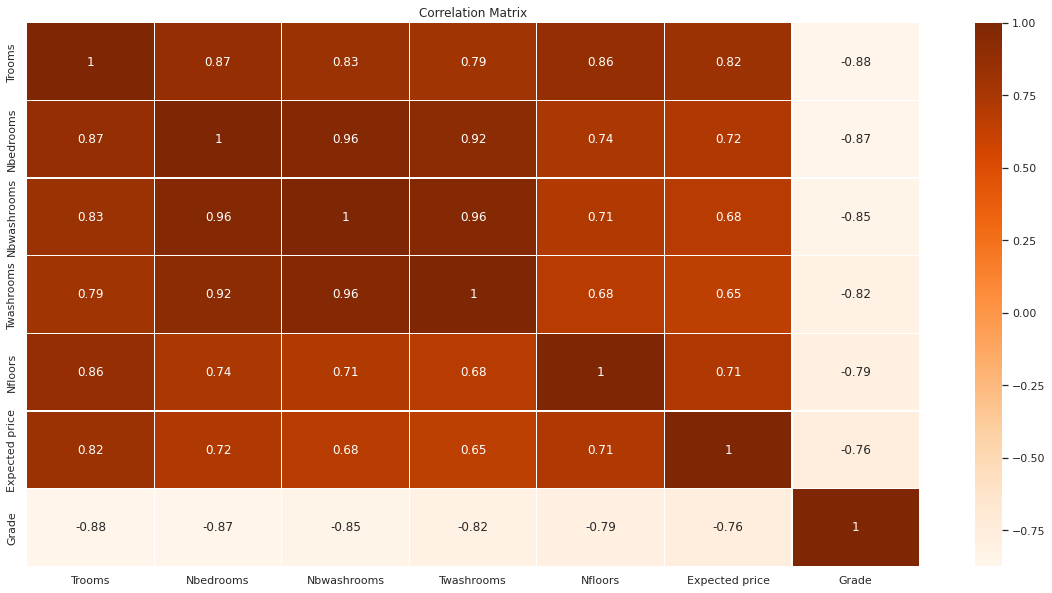

In [108]:
#SELECTING BEST FEATURE BASED ON THERE CORRELATION VALUE GREATER THAN 0.2

sel_corr = []
for i in house_data_scaled:
  if abs(house_data_scaled[i].corr(house_data_scaled['Grade']))>=0.2:
    sel_corr.append(i) 

#PLOTTING HEATMAP AMONG SELECTED FEATURES

fig, ax = plt.subplots(figsize = (20,10))
ax = (sns.heatmap(house_data_scaled[sel_corr]
                  .corr(), annot =True, cmap ='Oranges',linewidths=0.1, linecolor='white').set(title = 'Correlation Matrix'))
plt.show()

In [109]:
house_data_scaled.drop(house_data_scaled.columns[[13]], axis=1, inplace=True)
HG = house_data2.iloc[:,[13]]
house_data_scaled2 = pd.concat([HG, house_data_scaled], axis=1)
house_data_scaled2

,Grade,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
0,3,0.000000,0.700000,0.25,0.500000,0.428571,0.500,0.0,0.000000,0.12,0.166667,0.650000,1.0,0.360251
1,3,0.000333,0.971429,0.00,0.333333,0.285714,0.250,1.0,0.591667,0.52,0.333333,0.533333,0.6,0.370944
2,2,0.000667,0.485714,0.50,0.500000,0.428571,0.375,1.0,0.841667,0.94,0.666667,0.400000,0.4,0.458702
3,3,0.001000,0.571429,0.25,0.333333,0.285714,0.375,1.0,0.841667,0.24,0.166667,0.316667,0.2,0.232301
4,3,0.001334,0.428571,0.50,0.333333,0.428571,0.375,0.0,0.000000,0.10,0.333333,0.000000,0.0,0.493732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,0.998666,0.728571,1.00,0.666667,0.571429,0.625,1.0,0.791667,0.90,0.666667,0.833333,0.2,0.642330
2996,0,0.999000,0.028571,1.00,1.000000,0.857143,0.750,1.0,0.966667,0.34,1.000000,0.950000,0.6,0.460546
2997,3,0.999333,0.542857,0.50,0.333333,0.285714,0.375,0.0,0.000000,0.16,0.666667,0.916667,1.0,0.406711
2998,1,0.999667,0.042857,1.00,0.833333,0.857143,0.750,0.0,0.000000,0.16,1.000000,0.183333,0.4,0.624631


CONSIDERING HIGHLY CORRELATED FEATURES (WITH TARGET FEATURE) ONLY FOR MODEL BUILDING

In [110]:
#CREATING NEW DATAFRAME WITH CORRELATED FEATURES
house_corr_df=house_data_scaled2[sel_corr]
house_corr_df

,Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Nfloors,Expected price,Grade
0,0.25,0.500000,0.428571,0.500,0.166667,0.360251,3
1,0.00,0.333333,0.285714,0.250,0.333333,0.370944,3
2,0.50,0.500000,0.428571,0.375,0.666667,0.458702,2
3,0.25,0.333333,0.285714,0.375,0.166667,0.232301,3
4,0.50,0.333333,0.428571,0.375,0.333333,0.493732,3
...,...,...,...,...,...,...,...
2995,1.00,0.666667,0.571429,0.625,0.666667,0.642330,1
2996,1.00,1.000000,0.857143,0.750,1.000000,0.460546,0
2997,0.50,0.333333,0.285714,0.375,0.666667,0.406711,3
2998,1.00,0.833333,0.857143,0.750,1.000000,0.624631,1


In [111]:
X = house_corr_df.iloc[:, :6].values
y = house_corr_df.iloc[:, -1].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 500)

print ("X train ",X_train.shape)
print ("X test ",X_test.shape)
print ("Y train ",y_train.shape)
print ("Y test ",y_test.shape)

X train  (2100, 6)
X test  (900, 6)
Y train  (2100,)
Y test  (900,)


In [112]:
# define lists to gather results for plotting later

results_f1, names = list(), list()
results_recall = list()
results_precision = list()
results_accuracy = list()

In [113]:
# define lists of mean values to gather results for dataframe later

results_f1_df, names_df= list(), list()
results_recall_df = list()
results_precision_df = list()
results_accuracy_df = list()

# **K-NEAREST NEIGHBOR CLASSIFIER**

In [114]:
from sklearn import neighbors
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

[0 1 2 3 4]
4
Minimum error:- 0.22555555555555556 at K = 4


0.8366666666666667

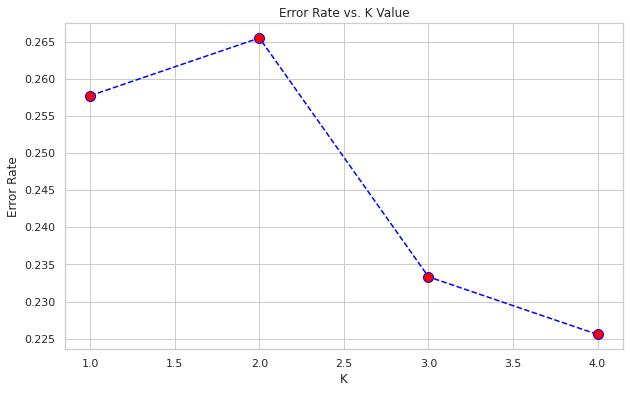

In [115]:
#CHECKING THE MINIMUM ERROR RATE OF THE KNN MODEL
error_rate = []
for i in range(1,5):
  knn = neighbors.KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

  # Model Properties
print(knn.classes_)
print(knn.n_neighbors)

plt.figure(figsize=(10,6))
plt.plot(range(1,5),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

knn.score(X_train, y_train)

In [116]:
# define the model with least error rate having neighbours as 4 as per above graph
model = neighbors.KNeighborsClassifier(n_neighbors=4)

# evaluate the model-1
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)
n_scores_f1 = cross_val_score(model, X_train, y_train, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores_recall = cross_val_score(model, X_train, y_train, scoring='recall_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores_precision = cross_val_score(model, X_train, y_train, scoring='precision_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores_accuracy = cross_val_score(model, X_train, y_train, cv=cv, n_jobs=-1, error_score='raise')


results_f1.append(n_scores_f1)
results_recall.append(n_scores_recall)
results_precision.append(n_scores_precision)
results_accuracy.append(n_scores_accuracy)
names.append('KNN')

f1_1=mean(n_scores_f1)
results_f1_df.append(f1_1)

recall_1=mean(n_scores_recall)
results_recall_df.append(recall_1)

prec_1=mean(n_scores_precision)
results_precision_df.append(prec_1)

accc_1=mean(n_scores_accuracy)
results_accuracy_df.append(accc_1)


print('F1-SCORE: %.3f (%.3f)' % (mean(n_scores_f1), std(n_scores_f1)))
print('RECALL-SCORE: %.3f (%.3f)' % (mean(n_scores_recall), std(n_scores_recall)))
print('PRECISION-SCORE: %.3f (%.3f)' % (mean(n_scores_precision), std(n_scores_precision)))
print('ACCURACY-SCORE: %.3f (%.3f)' % (mean(n_scores_accuracy), std(n_scores_accuracy)))

F1-SCORE: 0.742 (0.027)
RECALL-SCORE: 0.751 (0.027)
PRECISION-SCORE: 0.736 (0.029)
ACCURACY-SCORE: 0.751 (0.027)


# **DECISION TREE CLASSIFIRE**

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [118]:
# define the model
model = DecisionTreeClassifier()

# evaluate the model-1
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)
n_scores_f1 = cross_val_score(model, X_train, y_train, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores_recall = cross_val_score(model, X_train, y_train, scoring='recall_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores_precision = cross_val_score(model, X_train, y_train, scoring='precision_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores_accuracy = cross_val_score(model, X_train, y_train, cv=cv, n_jobs=-1, error_score='raise')


results_f1.append(n_scores_f1)
results_recall.append(n_scores_recall)
results_precision.append(n_scores_precision)
results_accuracy.append(n_scores_accuracy)
names.append('DTC')

f1_2=mean(n_scores_f1)
results_f1_df.append(f1_2)

recall_2=mean(n_scores_recall)
results_recall_df.append(recall_2)

prec_2=mean(n_scores_precision)
results_precision_df.append(prec_2)

accc_2=mean(n_scores_accuracy)
results_accuracy_df.append(accc_2)

print('F1-SCORE: %.3f (%.3f)' % (mean(n_scores_f1), std(n_scores_f1)))
print('RECALL-SCORE: %.3f (%.3f)' % (mean(n_scores_recall), std(n_scores_recall)))
print('PRECISION-SCORE: %.3f (%.3f)' % (mean(n_scores_precision), std(n_scores_precision)))
print('ACCURACY-SCORE: %.3f (%.3f)' % (mean(n_scores_accuracy), std(n_scores_accuracy)))

F1-SCORE: 0.693 (0.027)
RECALL-SCORE: 0.697 (0.023)
PRECISION-SCORE: 0.699 (0.024)
ACCURACY-SCORE: 0.697 (0.023)


## **RANDOM FOREST CLASSIFIER**



In [119]:
from sklearn.ensemble import RandomForestClassifier

In [120]:
# define the model
model = RandomForestClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)
n_scores_f1 = cross_val_score(model, X_train, y_train, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores_recall = cross_val_score(model, X_train, y_train, scoring='recall_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores_precision = cross_val_score(model, X_train, y_train, scoring='precision_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores_accuracy = cross_val_score(model, X_train, y_train, cv=cv, n_jobs=-1, error_score='raise')


results_f1.append(n_scores_f1)
results_recall.append(n_scores_recall)
results_precision.append(n_scores_precision)
results_accuracy.append(n_scores_accuracy)
names.append('RFC')


f1_3=mean(n_scores_f1)
results_f1_df.append(f1_3)

recall_3=mean(n_scores_recall)
results_recall_df.append(recall_3)

prec_3=mean(n_scores_precision)
results_precision_df.append(prec_3)

accc_3=mean(n_scores_accuracy)
results_accuracy_df.append(accc_3)


# report performance
print('F1-SCORE: %.3f (%.3f)' % (mean(n_scores_f1), std(n_scores_f1)))
print('RECALL-SCORE: %.3f (%.3f)' % (mean(n_scores_recall), std(n_scores_recall)))
print('PRECISION-SCORE: %.3f (%.3f)' % (mean(n_scores_precision), std(n_scores_recall)))
print('ACCURACY-SCORE: %.3f (%.3f)' % (mean(n_scores_accuracy), std(n_scores_accuracy)))

F1-SCORE: 0.715 (0.017)
RECALL-SCORE: 0.721 (0.015)
PRECISION-SCORE: 0.712 (0.015)
ACCURACY-SCORE: 0.719 (0.017)


## **ADABOOST CLASSIFIER**

In [121]:
from sklearn.ensemble import AdaBoostClassifier

In [122]:
# define the model
model = AdaBoostClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)
n_scores_f1 = cross_val_score(model, X_train, y_train, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores_recall = cross_val_score(model, X_train, y_train, scoring='recall_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores_precision = cross_val_score(model, X_train, y_train, scoring='precision_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores_accuracy = cross_val_score(model, X_train, y_train, cv=cv, n_jobs=-1, error_score='raise')

results_f1.append(n_scores_f1)
results_recall.append(n_scores_recall)
results_precision.append(n_scores_precision)
results_accuracy.append(n_scores_accuracy)
names.append('ADA')


f1_4=mean(n_scores_f1)
results_f1_df.append(f1_4)

recall_4=mean(n_scores_recall)
results_recall_df.append(recall_4)

prec_4=mean(n_scores_precision)
results_precision_df.append(prec_4)

accc_4=mean(n_scores_accuracy)
results_accuracy_df.append(accc_4)


# report performance
print('F1-SCORE: %.3f (%.3f)' % (mean(n_scores_f1), std(n_scores_f1)))
print('RECALL-SCORE: %.3f (%.3f)' % (mean(n_scores_recall), std(n_scores_recall)))
print('PRECISION-SCORE: %.3f (%.3f)' % (mean(n_scores_precision), std(n_scores_recall)))
print('ACCURACY-SCORE: %.3f (%.3f)' % (mean(n_scores_accuracy), std(n_scores_accuracy)))


F1-SCORE: 0.565 (0.026)
RECALL-SCORE: 0.598 (0.031)
PRECISION-SCORE: 0.597 (0.031)
ACCURACY-SCORE: 0.598 (0.031)


#**STACKING MODEL**

In [123]:
# required Python libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier

In [124]:
# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('svc', SVC()))
	level0.append(('bayes', GaussianNB()))
	# define meta learner model
	level1 = DecisionTreeClassifier()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

In [125]:
# define the model
model = get_stacking()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores_f1 = cross_val_score(model, X_train, y_train, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores_recall = cross_val_score(model, X_train, y_train, scoring='recall_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores_precision = cross_val_score(model, X_train, y_train, scoring='precision_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores_accuracy = cross_val_score(model, X_train, y_train, cv=cv, n_jobs=-1, error_score='raise')

results_f1.append(n_scores_f1)
results_recall.append(n_scores_recall)
results_precision.append(n_scores_precision)
results_accuracy.append(n_scores_accuracy)
names.append('STACKING')


f1_5=mean(n_scores_f1)
results_f1_df.append(f1_5)

recall_5=mean(n_scores_recall)
results_recall_df.append(recall_5)

prec_5=mean(n_scores_precision)
results_precision_df.append(prec_5)

accc_5=mean(n_scores_accuracy)
results_accuracy_df.append(accc_5)


# report performance
print('F1-SCORE: %.3f (%.3f)' % (mean(n_scores_f1), std(n_scores_f1)))
print('RECALL-SCORE: %.3f (%.3f)' % (mean(n_scores_recall), std(n_scores_recall)))
print('PRECISION-SCORE: %.3f (%.3f)' % (mean(n_scores_precision), std(n_scores_recall)))
print('ACCURACY-SCORE: %.3f (%.3f)' % (mean(n_scores_accuracy), std(n_scores_accuracy)))


F1-SCORE: 0.700 (0.026)
RECALL-SCORE: 0.694 (0.031)
PRECISION-SCORE: 0.704 (0.031)
ACCURACY-SCORE: 0.701 (0.029)


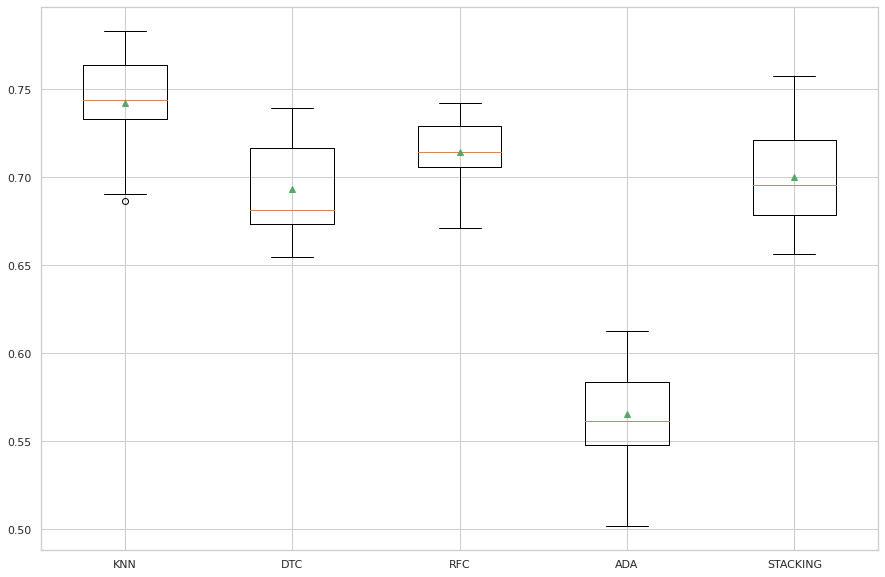

In [129]:
from matplotlib import pyplot
plt.figure(figsize=(15,10))
# plot model performance for comparison
pyplot.boxplot(results_f1, labels=names, showmeans=True)
pyplot.show()

In [127]:
pd.DataFrame({'MODEL NAMES': ['KNN','DTC','RFC','ADA','STACKING'],
              'F1-SCORE': results_f1_df, 
              'RECALL-SCORE': results_recall_df,
              'PRECISION-SCORE':results_precision_df,
              'ACCURACY-SCORE':results_accuracy_df})

,MODEL NAMES,F1-SCORE,RECALL-SCORE,PRECISION-SCORE,ACCURACY-SCORE
0,KNN,0.742069,0.751429,0.736336,0.751429
1,DTC,0.693415,0.696667,0.698752,0.696905
2,RFC,0.714673,0.721429,0.711607,0.719048
3,ADA,0.565228,0.598095,0.596549,0.598095
4,STACKING,0.700339,0.694127,0.703682,0.701111


**CONCLUSION**-

CONSIDERING ALL THE MODELS WE CAN SEE THAT THE  **KNN**  SHOWS THE HIGH F1-SCORE VALUES, HENCE IT IS BEST FITTED MODEL FOR OUR DATA.
